# Midterm Project

## Import File and Libraries

In [35]:
#import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
!pip install scipy
from scipy import stats
import math
import statsmodels.api as sm

!pip install pingouin
import pingouin as pg

from statsmodels.graphics.factorplots import interaction_plot
from sklearn.linear_model import LinearRegression
from sklearn import metrics

!pip install bioinfokit
from bioinfokit.analys import stat

In [36]:
#open file
df = pd.read_csv('diabetes.csv') 

In [37]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [38]:
df.head(30)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   
20            3      126             88             41      235  39.3   
21            8       99             84              0        0  35.4   
22            7      196             90              0        0  39.8   
23            9      119             80             35        0  29.0   
24           11      143             94             33      146  36.6   
25           10      125             70             26      115  31.1   
26            7      147             76              0        0  39.4   
27            1       97             66             15      140  23.2   
28           13      145             82             19      110  22.2   
29            5      117             92              0        0  34.1   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1  
20                     0.704   27        0  
21                     0.388   50        0  
22                     0.451   41        1  
23                     0.263   29        1  
24                     0.254   51        1  
25                     0.205   41        1  
26                     0.257   43        1  
27                     0.487   22        0  
28                     0.245   57        0  
29                     0.337   38        0

In [39]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
#Compare outcomes
df['Outcome'].value_counts()
#more 0's than 1's

0    500
1    268
Name: Outcome, dtype: int64

## Data Cleaning

In [42]:
#no null values, but some rows have zero as values
#figure out how many missing values/zeros
#zero for outcome variable indicates a person is not diabetic 
(df== 0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [43]:
#percentage of missing values 
Missing_p = (df== 0).sum(axis=0) * 100 / len(df)
missing_p_df = pd.DataFrame({'percent_missing': Missing_p})
missing_p_df

percent_missing
Pregnancies                     14.453125
Glucose                          0.651042
BloodPressure                    4.557292
SkinThickness                   29.557292
Insulin                         48.697917
BMI                              1.432292
DiabetesPedigreeFunction         0.000000
Age                              0.000000
Outcome                         65.104167

In [44]:
#missing values multiple imputation method 
df_fill = df
df_fill['Pregnancies']=df_fill['Pregnancies'].replace(0, np.nan)
df_fill['Glucose']=df_fill['Glucose'].replace(0, np.nan)
df_fill['BloodPressure']=df_fill['BloodPressure'].replace(0, np.nan)
df_fill['SkinThickness']=df_fill['SkinThickness'].replace(0, np.nan)
df_fill['Insulin']=df_fill['Insulin'].replace(0, np.nan)
df_fill['BMI']=df_fill['BMI'].replace(0, np.nan)

In [45]:
imputer = KNNImputer(n_neighbors=2)
df_fill_2 = imputer.fit_transform(df_fill)
df_fill_3 = pd.DataFrame(df_fill_2, columns =['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])
df_fill_3

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    113.0  33.6   
1            1.0     85.0           66.0           29.0     88.5  26.6   
2            8.0    183.0           64.0           24.0    227.5  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            6.5    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0    202.5  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           33.5    123.5  30.1   
767          1.0     93.0           70.0           31.0     62.5  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1                       0.351  31.0      0.0  
2                       0.672  32.0      1.0  
3                       0.167  21.0      0.0  
4                       2.288  33.0      1.0  
..                        ...   ...      ...  
763                     0.171  63.0      0.0  
764                     0.340  27.0      0.0  
765                     0.245  30.0      0.0  
766                     0.349  47.0      1.0  
767                     0.315  23.0      0.0  

[768 rows x 9 columns]

## Categorical Column

In [46]:
#create bins 
df_fill_3

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    113.0  33.6   
1            1.0     85.0           66.0           29.0     88.5  26.6   
2            8.0    183.0           64.0           24.0    227.5  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            6.5    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0    202.5  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           33.5    123.5  30.1   
767          1.0     93.0           70.0           31.0     62.5  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1                       0.351  31.0      0.0  
2                       0.672  32.0      1.0  
3                       0.167  21.0      0.0  
4                       2.288  33.0      1.0  
..                        ...   ...      ...  
763                     0.171  63.0      0.0  
764                     0.340  27.0      0.0  
765                     0.245  30.0      0.0  
766                     0.349  47.0      1.0  
767                     0.315  23.0      0.0  

[768 rows x 9 columns]

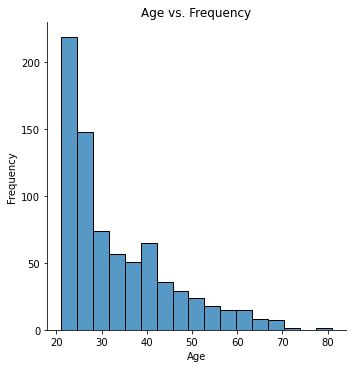

In [47]:
sns.displot(df, x="Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age vs. Frequency")
plt.show()

In [48]:
#Find Max, Min, and bin sizes
df_fill_3['Age'].max()

81.0

In [49]:
df_fill_3['Age'].min()

21.0

In [50]:
((df_fill_3['Age'].max())-(df_fill_3['Age'].min()))/3

20.0

In [51]:
#create three bins based on above formula
categorical = pd.cut(df_fill_3.Age,bins=[0,41,61,81], labels=['Young_Adult', 'Middle_Aged', 'Elderly'])
df_fill_3.insert(7,'Age_Category',categorical)
df_fill_3

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    113.0  33.6   
1            1.0     85.0           66.0           29.0     88.5  26.6   
2            8.0    183.0           64.0           24.0    227.5  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            6.5    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0    202.5  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           33.5    123.5  30.1   
767          1.0     93.0           70.0           31.0     62.5  30.4   

     DiabetesPedigreeFunction Age_Category   Age  Outcome  
0                       0.627  Middle_Aged  50.0      1.0  
1                       0.351  Young_Adult  31.0      0.0  
2                       0.672  Young_Adult  32.0      1.0  
3                       0.167  Young_Adult  21.0      0.0  
4                       2.288  Young_Adult  33.0      1.0  
..                        ...          ...   ...      ...  
763                     0.171      Elderly  63.0      0.0  
764                     0.340  Young_Adult  27.0      0.0  
765                     0.245  Young_Adult  30.0      0.0  
766                     0.349  Middle_Aged  47.0      1.0  
767                     0.315  Young_Adult  23.0      0.0  

[768 rows x 10 columns]

# Exploratory Data Analysis

In [52]:
#DF for each age categories
df_YA = df_fill_3.loc[df_fill_3['Age_Category'] == 'Young_Adult']
df_MA = df_fill_3.loc[df_fill_3['Age_Category'] == 'Middle_Aged']
df_E = df_fill_3.loc[df_fill_3['Age_Category'] == 'Elderly']

In [53]:
df_YA.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   596.000000  596.000000     596.000000     596.000000  596.000000   
mean      3.661074  118.778523      70.456376      28.647651  145.210570   
std       2.546059   29.880188      12.028808       9.700949  100.992165   
min       1.000000   44.000000      24.000000       8.000000   14.000000   
25%       2.000000   97.000000      62.000000      21.375000   76.000000   
50%       3.000000  114.000000      70.000000      29.000000  116.250000   
75%       5.000000  136.000000      78.000000      36.000000  181.250000   
max      14.000000  199.000000     122.000000      63.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  596.000000                596.000000  596.000000  596.000000  
mean    32.334312                  0.468713   27.983221    0.300336  
std      7.084710                  0.331004    5.964860    0.458789  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.245750   23.000000    0.000000  
50%     32.000000                  0.369000   26.000000    0.000000  
75%     36.525000                  0.613250   32.000000    1.000000  
max     67.100000                  2.420000   41.000000    1.000000

In [54]:
df_MA.describe()


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   147.000000  147.000000     147.000000     147.000000  147.000000   
mean      7.278912  130.489796      78.863946      30.751701  186.479592   
std       3.321850   30.725779      10.932946       7.823037  117.120809   
min       1.000000   61.000000      52.000000       7.000000   29.000000   
25%       5.000000  106.000000      72.000000      26.000000  118.000000   
50%       7.000000  128.000000      78.000000      30.000000  155.000000   
75%       9.000000  153.000000      84.500000      35.750000  221.000000   
max      17.000000  197.000000     114.000000      54.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  147.000000                147.000000  147.000000  147.000000  
mean    33.280612                  0.491313   48.965986    0.564626  
std      6.374063                  0.348953    5.642810    0.497501  
min     19.600000                  0.085000   42.000000    0.000000  
25%     28.900000                  0.234500   44.000000    0.000000  
50%     33.300000                  0.378000   48.000000    1.000000  
75%     37.150000                  0.656500   53.000000    1.000000  
max     47.900000                  1.781000   61.000000    1.000000

In [55]:
df_E.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count    25.000000   25.000000      25.000000      25.000000   25.000000   
mean      5.600000  136.160000      78.280000      30.800000  213.020000   
std       2.719528   32.700255      11.851582      18.409124   89.602418   
min       1.000000   57.000000      50.000000      12.000000   52.000000   
25%       4.000000  119.000000      74.000000      20.500000  162.500000   
50%       5.000000  135.000000      80.000000      27.500000  197.500000   
75%       8.000000  158.000000      83.000000      33.000000  253.000000   
max      12.000000  197.000000     108.000000      99.000000  463.000000   

             BMI  DiabetesPedigreeFunction        Age   Outcome  
count  25.000000                 25.000000  25.000000  25.00000  
mean   29.372000                  0.433000  66.120000   0.24000  
std     5.131887                  0.217208   4.126338   0.43589  
min    19.600000                  0.171000  62.000000   0.00000  
25%    26.500000                  0.247000  63.000000   0.00000  
50%    27.900000                  0.409000  66.000000   0.00000  
75%    32.900000                  0.587000  67.000000   0.00000  
max    39.200000                  0.832000  81.000000   1.00000

#### Pregnancies

Text(0, 0.5, 'Number of Pregnancies')

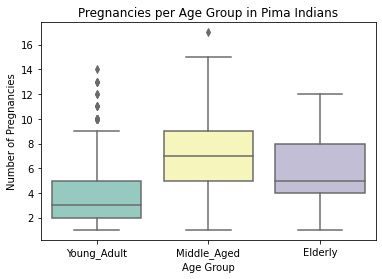

In [56]:
ax = sns.boxplot(x="Age_Category", y="Pregnancies",
                 data=df_fill_3, palette="Set3")
ax.set_title('Pregnancies per Age Group in Pima Indians')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Pregnancies')

Text(0, 0.5, 'Number of Pregnancies')

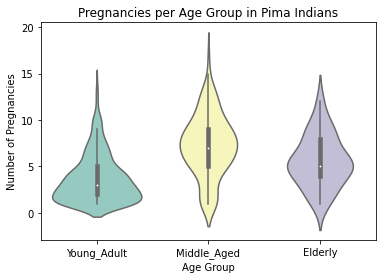

In [57]:
ax = sns.violinplot(x="Age_Category", y="Pregnancies",
                 data=df_fill_3, palette="Set3")
ax.set_title('Pregnancies per Age Group in Pima Indians')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Pregnancies')

In [58]:
##t-test YA and MA, Pregnancies

mean1 = df_YA['Pregnancies'].mean()
mean2 = df_MA['Pregnancies'].mean()

SD1 = np.std(df_YA['Pregnancies'])
SD2 = np.std(df_MA['Pregnancies'])

n1 = len(df_YA['Pregnancies'])
n2 = len(df_MA['Pregnancies'])

SE1 = SD1/math.sqrt(n1)
SE2 = SD2/math.sqrt(n2)

SEBW = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

df = n1 + n2 - 2

t_statistic = (mean1 - mean2) / SEBW

p_value = stats.t.sf(np.abs(t_statistic), df)*2   

print(t_statistic, df, p_value, SD1**2, SD2**2)

-12.37900411192285 741 3.991120528628477e-32 6.471538444214223 10.959623305104351


In [59]:
##t-test YA and E, Pregnancies

mean1 = df_YA['Pregnancies'].mean()
mean2 = df_E['Pregnancies'].mean()

SD1 = np.std(df_YA['Pregnancies'])
SD2 = np.std(df_E['Pregnancies'])

n1 = len(df_YA['Pregnancies'])
n2 = len(df_E['Pregnancies'])

SE1 = SD1/math.sqrt(n1)
SE2 = SD2/math.sqrt(n2)

SEBW = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

df = n1 + n2 - 2

t_statistic = (mean1 - mean2) / SEBW

p_value = stats.t.sf(np.abs(t_statistic), df)*2   

print(t_statistic, df, p_value,SD1**2, SD2**2)

-3.5707102079709205 619 0.0003836342477340438 6.471538444214223 7.1


In [60]:
##t-test MA and E, Pregnancies

mean1 = df_MA['Pregnancies'].mean()
mean2 = df_E['Pregnancies'].mean()

SD1 = np.std(df_MA['Pregnancies'])
SD2 = np.std(df_E['Pregnancies'])

n1 = len(df_MA['Pregnancies'])
n2 = len(df_E['Pregnancies'])

SE1 = SD1/math.sqrt(n1)
SE2 = SD2/math.sqrt(n2)

SEBW = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

df = n1 + n2 - 2

t_statistic = (mean1 - mean2) / SEBW

p_value = stats.t.sf(np.abs(t_statistic), df)*2   

print(t_statistic, df, p_value,SD1**2, SD2**2)

2.803817688595625 170 0.005637857011059051 10.959623305104351 7.1


In [62]:
#ANOVA - one way - Pregnancies
total_mean = df_fill_3['Pregnancies'].mean()

SS_T = sum((df_fill_3['Pregnancies'] - (total_mean))**2)

df_fill_3_a = df_fill_3[['Pregnancies', 'Age_Category']]

#each group mean 
group_means = df_fill_3_a.groupby('Age_Category').mean()                            
                                  
#add means to data frame
df_fill_3_a = df_fill_3_a.merge(group_means, left_on = 'Age_Category',right_index = True)

#SS
SS_W = sum((df_fill_3_a['Pregnancies_x'] - df_fill_3_a['Pregnancies_y'])**2 )

SS_B = sum(((total_mean) - (df_fill_3_a['Pregnancies_y']))**2)

#DF
k = len(pd.unique(df_fill_3_a.Age_Category)) 
N = len(df_fill_3_a.values) 
n = df_fill_3_a.groupby('Age_Category').size()[0]

DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

#MS

MSbetween = SS_B/DFbetween

MSwithin = SS_W/DFwithin

#F and P statistic

F = MSbetween/MSwithin

p = stats.f.sf(F, DFbetween, DFwithin)

eta_sqrd = SS_B/SS_T

om_sqrd = (SS_B - (DFbetween * MSwithin))/(SS_T + MSwithin)

F_crit = stats.f.ppf(q=1-.05, dfn=DFbetween, dfd=DFwithin )


print(SS_W,SS_B, DFbetween, DFwithin,DFtotal,MSbetween,MSwithin, F,eta_sqrd,om_sqrd,p,F_crit)

5645.601538601995 1579.565128064605 2 765 767 789.7825640323025 7.37987129229019 107.01847400203233 0.2186198880853415 0.21635607559071693 1.0467671327161339e-41 3.007494217264394


In [45]:
#posthoc test
df_fill_3_a_mean = df_fill_3_a.groupby('Age_Category')['Pregnancies_x'].mean()
df_fill_3_a_mean df_fill_3_a_mean 

Age_Category
Young_Adult    3.661074
Middle_Aged    7.278912
Elderly        5.600000
Name: Pregnancies_x, dtype: float64

In [81]:
#posthoc test
df_fill_3_a_mean = df_fill_3_a.groupby('Age_Category')['Pregnancies_x'].mean()
df_fill_3_a_mean df_fill_3_a_mean 

Mean_YA = 3.661074
Mean_MA = 7.278912
Mean_E = 5.600000

Diff1 = (Mean_YA - Mean_MA)
Diff2 = (Mean_YA - Mean_E)
Diff3 = (Mean_MA - Mean_E)

SD1 = np.std(df_MA['Pregnancies'])
SD2 = np.std(df_E['Pregnancies'])
SD3 = np.std(df_YA['Pregnancies'])

n1 = len(df_MA['Pregnancies'])
n2 = len(df_E['Pregnancies'])
n3 = len(df_YA['Pregnancies'])

SEBW1 = math.sqrt(((SD3**2.0)/n3) + ((SD1**2.0)/n1))
SEBW2 = math.sqrt(((SD3**2.0)/n3) + ((SD2**2.0)/n2))
SEBW3 = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

#alpha = 0.05, (2,743-2)
q1=2.78

Tukey1 =  '0'
Tukey2 = '0.0014'
Tukey3 = '0.012'

Cohen1 = (Mean_YA - Mean_MA) / (math.sqrt(((n3 - 1)*SD3**2 + (n1 - 1)*SD1**2) / (n3 + n1 - 2)))
Cohen2 = (Mean_YA - Mean_E) / (math.sqrt(((n3 - 1)*SD3**2 + (n2 - 1)*SD2**2) / (n3 + n2 - 2)))
Cohen3 = (Mean_MA - Mean_E) / (math.sqrt(((n1 - 1)*SD1**2 + (n2 - 1)*SD2**2) / (n1 + n2 - 2)))

print(SEBW1, SEBW2, SEBW3, Diff1, Diff2, Diff3, Tukey1, Tukey2, Tukey3, Cohen1, Cohen2, Cohen3)


0.2922559606905672 0.5430085505590361 0.5987948401405453 -3.617838 -1.9389259999999995 1.6789120000000004 0 0.0014 0.012 -1.333930677150786 -0.7607490036118191 0.5202400884381274


In [77]:
print(n1, n2, n3, n1+n2, n1+n3, n2+n3)

147 25 596 172 743 621


In [43]:
df_fill_3_mean = df_fill_3.groupby('Age_Category').mean()
df_fill_3_mean 

Pregnancies     Glucose  BloodPressure  SkinThickness  \
Age_Category                                                          
Young_Adult      3.661074  118.778523      70.456376      28.647651   
Middle_Aged      7.278912  130.489796      78.863946      30.751701   
Elderly          5.600000  136.160000      78.280000      30.800000   

                 Insulin        BMI  DiabetesPedigreeFunction        Age  \
Age_Category                                                               
Young_Adult   145.210570  32.334312                  0.468713  27.983221   
Middle_Aged   186.479592  33.280612                  0.491313  48.965986   
Elderly       213.020000  29.372000                  0.433000  66.120000   

               Outcome  
Age_Category            
Young_Adult   0.300336  
Middle_Aged   0.564626  
Elderly       0.240000

#### Glucose

Text(0, 0.5, 'Glucose Level in mg/dL')

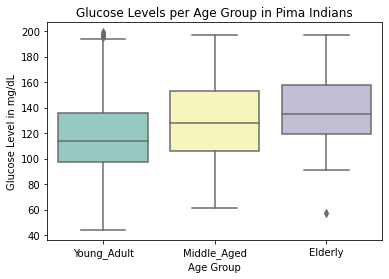

In [434]:
ax = sns.boxplot(x="Age_Category", y="Glucose",
                 data=df_fill_3, palette="Set3")
ax.set_title('Glucose Levels per Age Group in Pima Indians')
ax.set_xlabel('Age Group')
ax.set_ylabel('Glucose Level in mg/dL')

Text(0, 0.5, 'Glucose Level in mg/dL')

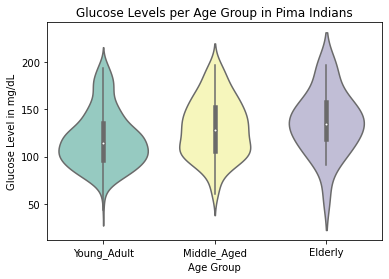

In [433]:
ax = sns.violinplot(x="Age_Category", y="Glucose",
                 data=df_fill_3, palette="Set3")
ax.set_title('Glucose Levels per Age Group in Pima Indians')
ax.set_xlabel('Age Group')
ax.set_ylabel('Glucose Level in mg/dL')

In [128]:
##t-test YA and MA, Glucose

mean1 = df_YA['Glucose'].mean()
mean2 = df_MA['Glucose'].mean()

SD1 = np.std(df_YA['Glucose'])
SD2 = np.std(df_MA['Glucose'])

n1 = len(df_YA['Glucose'])
n2 = len(df_MA['Glucose'])

SE1 = SD1/math.sqrt(n1)
SE2 = SD2/math.sqrt(n2)

SEBW = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

df = n1 + n2 - 2

t_statistic = (mean1 - mean2) / SEBW

p_value = stats.t.sf(np.abs(t_statistic), df)*2   

print(t_statistic, df, p_value,SD1**2, SD2**2)



-4.173531805580487 741 3.35515553715598e-05 891.3276260078375 937.6512564209356


In [129]:
##t-test YA and E, Glucose

mean1 = df_YA['Glucose'].mean()
mean2 = df_E['Glucose'].mean()

SD1 = np.std(df_YA['Glucose'])
SD2 = np.std(df_E['Glucose'])

n1 = len(df_YA['Glucose'])
n2 = len(df_E['Glucose'])

SE1 = SD1/math.sqrt(n1)
SE2 = SD2/math.sqrt(n2)

SEBW = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

df = n1 + n2 - 2

t_statistic = (mean1 - mean2) / SEBW

p_value = stats.t.sf(np.abs(t_statistic), df)*2   

print(t_statistic, df, p_value,SD1**2, SD2**2)


-2.664414039883338 619 0.007913224872673095 891.3276260078375 1026.5344


In [130]:
##t-test MA and E, Glucose

mean1 = df_MA['Glucose'].mean()
mean2 = df_E['Glucose'].mean()

SD1 = np.std(df_MA['Glucose'])
SD2 = np.std(df_E['Glucose'])

n1 = len(df_MA['Glucose'])
n2 = len(df_E['Glucose'])

SE1 = SD1/math.sqrt(n1)
SE2 = SD2/math.sqrt(n2)

SEBW = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

df = n1 + n2 - 2

t_statistic = (mean1 - mean2) / SEBW

p_value = stats.t.sf(np.abs(t_statistic), df)*2   

print(t_statistic, df, p_value,SD1**2, SD2**2)



-0.8232401660959621 170 0.41152478090788946 937.6512564209356 1026.5344


In [131]:
#ANOVA - one way - Glucose
total_mean = df_fill_3['Glucose'].mean()

SS_T = sum((df_fill_3['Glucose'] - (total_mean))**2)

df_fill_3_a = df_fill_3[['Glucose', 'Age_Category']]

#each group mean 
group_means = df_fill_3_a.groupby('Age_Category').mean()                            
                                  
#add means to data frame
df_fill_3_a = df_fill_3_a.merge(group_means, left_on = 'Age_Category',right_index = True)

#SS
SS_W = sum((df_fill_3_a['Glucose_x'] - df_fill_3_a['Glucose_y'])**2 )

SS_B = sum(((total_mean) - (df_fill_3_a['Glucose_y']))**2)

#DF
k = len(pd.unique(df_fill_3_a.Age_Category)) 
N = len(df_fill_3_a.values) 
n = df_fill_3_a.groupby('Age_Category').size()[0]

DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

#MS

MSbetween = SS_B/DFbetween

MSwithin = SS_W/DFwithin

#F and P statistic

F = MSbetween/MSwithin

p = stats.f.sf(F, DFbetween, DFwithin)

eta_sqrd = SS_B/SS_T

om_sqrd = (SS_B - (DFbetween * MSwithin))/(SS_T + MSwithin)

F_crit = stats.f.ppf(q=1-.05, dfn=DFbetween, dfd=DFwithin )


print(SS_W,SS_B, DFbetween, DFwithin,DFtotal,MSbetween,MSwithin, F,eta_sqrd,om_sqrd,p,F_crit)


694729.359794549 21661.468330451513 2 765 767 10830.734165225756 908.1429539798025 11.926243679766122 0.030236942573854248 0.027666542435771612 7.936074368313511e-06 3.007494217264394


In [83]:
#posthoc test
df_fill_3_a_mean = df_fill_3.groupby('Age_Category')['Glucose'].mean()
df_fill_3_a_mean 


Age_Category
Young_Adult    118.778523
Middle_Aged    130.489796
Elderly        136.160000
Name: Glucose, dtype: float64

In [84]:
Mean_YA = 118.778523
Mean_MA = 130.489796
Mean_E = 136.160000

Diff1 = (Mean_YA - Mean_MA)
Diff2 = (Mean_YA - Mean_E)
Diff3 = (Mean_MA - Mean_E)

SD1 = np.std(df_MA['Glucose'])
SD2 = np.std(df_E['Glucose'])
SD3 = np.std(df_YA['Glucose'])

n1 = len(df_MA['Glucose'])
n2 = len(df_E['Glucose'])
n3 = len(df_YA['Glucose'])

SEBW1 = math.sqrt(((SD3**2.0)/n3) + ((SD1**2.0)/n1))
SEBW2 = math.sqrt(((SD3**2.0)/n3) + ((SD2**2.0)/n2))
SEBW3 = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

#alpha = 0.05, (2,743-2)
q1=2.78

Tukey1 =  '0.000081'
Tukey2 = '0.013430'
Tukey3 = '0.659577'

Cohen1 = (Mean_YA - Mean_MA) / (math.sqrt(((n3 - 1)*SD3**2 + (n1 - 1)*SD1**2) / (n3 + n1 - 2)))
Cohen2 = (Mean_YA - Mean_E) / (math.sqrt(((n3 - 1)*SD3**2 + (n2 - 1)*SD2**2) / (n3 + n2 - 2)))
Cohen3 = (Mean_MA - Mean_E) / (math.sqrt(((n1 - 1)*SD1**2 + (n2 - 1)*SD2**2) / (n1 + n2 - 2)))

print(SEBW1, SEBW2, SEBW3, Diff1, Diff2, Diff3, Tukey1, Tukey2, Tukey3, Cohen1, Cohen2, Cohen3)


2.80608198858702 6.523564374712636 6.88766694720735 -11.711273000000006 -17.38147699999999 -5.670203999999984 0.000081 0.013430 0.659577 -0.3902771649626664 -0.5804898131228001 -0.18394640023341313


#### BloodPressure

Text(0, 0.5, 'Blood Pressure Level in mm Hg')

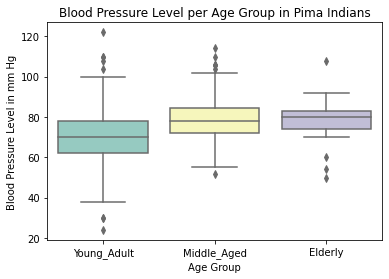

In [132]:
ax = sns.boxplot(x="Age_Category", y="BloodPressure",
                 data=df_fill_3, palette="Set3")
ax.set_title('Blood Pressure Level per Age Group in Pima Indians')
ax.set_xlabel('Age Group')
ax.set_ylabel('Blood Pressure Level in mm Hg')

Text(0, 0.5, 'Blood Pressure Level in mm Hg')

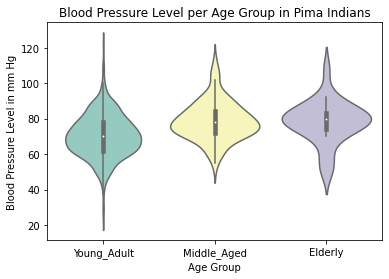

In [133]:
ax = sns.violinplot(x="Age_Category", y="BloodPressure",
                 data=df_fill_3, palette="Set3")
ax.set_title('Blood Pressure Level per Age Group in Pima Indians')
ax.set_xlabel('Age Group')
ax.set_ylabel('Blood Pressure Level in mm Hg')

In [134]:
##t-test YA and MA, BloodPressure

mean1 = df_YA['BloodPressure'].mean()
mean2 = df_MA['BloodPressure'].mean()

SD1 = np.std(df_YA['BloodPressure'])
SD2 = np.std(df_MA['BloodPressure'])

n1 = len(df_YA['BloodPressure'])
n2 = len(df_MA['BloodPressure'])

SE1 = SD1/math.sqrt(n1)
SE2 = SD2/math.sqrt(n2)

SEBW = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

df = n1 + n2 - 2

t_statistic = (mean1 - mean2) / SEBW

p_value = stats.t.sf(np.abs(t_statistic), df)*2   

print(t_statistic, df, p_value,SD1**2, SD2**2)


-8.205112365657575 741 1.0177360012751437e-15 144.4494392144498 118.71618307186823


In [135]:
##t-test YA and E, BloodPressure

mean1 = df_YA['BloodPressure'].mean()
mean2 = df_E['BloodPressure'].mean()

SD1 = np.std(df_YA['BloodPressure'])
SD2 = np.std(df_E['BloodPressure'])

n1 = len(df_YA['BloodPressure'])
n2 = len(df_E['BloodPressure'])

SE1 = SD1/math.sqrt(n1)
SE2 = SD2/math.sqrt(n2)

SEBW = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

df = n1 + n2 - 2

t_statistic = (mean1 - mean2) / SEBW

p_value = stats.t.sf(np.abs(t_statistic), df)*2   

print(t_statistic, df, p_value,SD1**2, SD2**2)


-3.295500456885756 619 0.0010385920860853772 144.4494392144498 134.8416


In [136]:
##t-test MA and E, BloodPressure

mean1 = df_MA['BloodPressure'].mean()
mean2 = df_E['BloodPressure'].mean()

SD1 = np.std(df_MA['BloodPressure'])
SD2 = np.std(df_E['BloodPressure'])

n1 = len(df_MA['BloodPressure'])
n2 = len(df_E['BloodPressure'])

SE1 = SD1/math.sqrt(n1)
SE2 = SD2/math.sqrt(n2)

SEBW = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

df = n1 + n2 - 2

t_statistic = (mean1 - mean2) / SEBW

p_value = stats.t.sf(np.abs(t_statistic), df)*2   

print(t_statistic, df, p_value,SD1**2, SD2**2)

0.23449441645722302 170 0.814883353559247 118.71618307186823 134.8416


In [139]:
#ANOVA - one way - BloodPressure
total_mean = df_fill_3['BloodPressure'].mean()

SS_T = sum((df_fill_3['BloodPressure'] - (total_mean))**2)

df_fill_3_a = df_fill_3[['BloodPressure', 'Age_Category']]

#each group mean 
group_means = df_fill_3_a.groupby('Age_Category').mean()                            
                                  
#add means to data frame
df_fill_3_a = df_fill_3_a.merge(group_means, left_on = 'Age_Category',right_index = True)

#SS
SS_W = sum((df_fill_3_a['BloodPressure_x'] - df_fill_3_a['BloodPressure_y'])**2 )

SS_B = sum(((total_mean) - (df_fill_3_a['BloodPressure_y']))**2)

#DF
k = len(pd.unique(df_fill_3_a.Age_Category)) 
N = len(df_fill_3_a.values) 
n = df_fill_3_a.groupby('Age_Category').size()[0]

DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

#MS

MSbetween = SS_B/DFbetween

MSwithin = SS_W/DFwithin

#F and P statistic

F = MSbetween/MSwithin

p = stats.f.sf(F, DFbetween, DFwithin)

eta_sqrd = SS_B/SS_T

om_sqrd = (SS_B - (DFbetween * MSwithin))/(SS_T + MSwithin)


F_crit = stats.f.ppf(q=1-.05, dfn=DFbetween, dfd=DFwithin )


print(SS_W,SS_B, DFbetween, DFwithin,DFtotal,MSbetween,MSwithin, F,eta_sqrd,om_sqrd,p,F_crit)

106914.18468337668 9253.018441623344 2 765 767 4626.509220811672 139.7571041612767 33.103928766818036 0.07965258861975674 0.07715363049313786 1.627652308959567e-14 3.007494217264394


In [93]:
df_fill_3_a_mean = df_fill_3_a.groupby('Age_Category')['BloodPressure_x'].mean()
df_fill_3_a_mean

Age_Category
Young_Adult    70.456376
Middle_Aged    78.863946
Elderly        78.280000
Name: BloodPressure_x, dtype: float64

In [97]:
Mean_YA = 70.456376
Mean_MA = 78.863946
Mean_E = 78.280000

Diff1 = (Mean_YA - Mean_MA)
Diff2 = (Mean_YA - Mean_E)
Diff3 = (Mean_MA - Mean_E)

SD1 = np.std(df_MA['BloodPressure'])
SD2 = np.std(df_E['BloodPressure'])
SD3 = np.std(df_YA['BloodPressure'])

n1 = len(df_MA['BloodPressure'])
n2 = len(df_E['BloodPressure'])
n3 = len(df_YA['BloodPressure'])

SEBW1 = math.sqrt(((SD3**2.0)/n3) + ((SD1**2.0)/n1))
SEBW2 = math.sqrt(((SD3**2.0)/n3) + ((SD2**2.0)/n2))
SEBW3 = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

#alpha = 0.05, (2,743-2)
q1=2.78

Tukey1 =  '0'
Tukey2 = '0.003547'
Tukey3 = '0.971672'

Cohen1 = (Mean_YA - Mean_MA) / (math.sqrt(((n3 - 1)*SD3**2 + (n1 - 1)*SD1**2) / (n3 + n1 - 2)))
Cohen2 = (Mean_YA - Mean_E) / (math.sqrt(((n3 - 1)*SD3**2 + (n2 - 1)*SD2**2) / (n3 + n2 - 2)))
Cohen3 = (Mean_MA - Mean_E) / (math.sqrt(((n1 - 1)*SD1**2 + (n2 - 1)*SD2**2) / (n1 + n2 - 2)))

print(SEBW1, SEBW2, SEBW3, Diff1, Diff2, Diff3, Tukey1, Tukey2, Tukey3, Cohen1, Cohen2, Cohen3)


1.0246745400459019 2.374032188260456 2.4902323349682765 -8.407569999999993 -7.823623999999995 0.5839459999999974 0 0.003547 0.971672 -0.7121500764536358 -0.6517946018544445 0.053087598680206065


#### SkinThickness

Text(0, 0.5, 'Skin Thickness in mm')

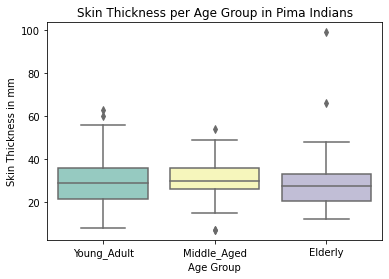

In [140]:
ax = sns.boxplot(x="Age_Category", y="SkinThickness",
                 data=df_fill_3, palette="Set3")
ax.set_title('Skin Thickness per Age Group in Pima Indians')
ax.set_xlabel('Age Group')
ax.set_ylabel('Skin Thickness in mm')

Text(0, 0.5, 'Skin Thickness in mm')

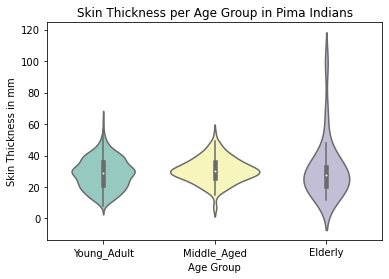

In [141]:
ax = sns.violinplot(x="Age_Category", y="SkinThickness",
                 data=df_fill_3, palette="Set3")
ax.set_title('Skin Thickness per Age Group in Pima Indians')
ax.set_xlabel('Age Group')
ax.set_ylabel('Skin Thickness in mm')

In [142]:
##t-test YA and MA, SkinThickness

mean1 = df_YA['SkinThickness'].mean()
mean2 = df_MA['SkinThickness'].mean()

SD1 = np.std(df_YA['SkinThickness'])
SD2 = np.std(df_MA['SkinThickness'])

n1 = len(df_YA['SkinThickness'])
n2 = len(df_MA['SkinThickness'])

SE1 = SD1/math.sqrt(n1)
SE2 = SD2/math.sqrt(n2)

SEBW = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

df = n1 + n2 - 2

t_statistic = (mean1 - mean2) / SEBW

p_value = stats.t.sf(np.abs(t_statistic), df)*2   

print(t_statistic, df, p_value,SD1**2, SD2**2)

-2.7841262906847497 741 0.005504060480425882 93.9505146164587 60.78358554306076


In [143]:
##t-test YA and E, SkinThickness

mean1 = df_YA['SkinThickness'].mean()
mean2 = df_E['SkinThickness'].mean()

SD1 = np.std(df_YA['SkinThickness'])
SD2 = np.std(df_E['SkinThickness'])

n1 = len(df_YA['SkinThickness'])
n2 = len(df_E['SkinThickness'])

SE1 = SD1/math.sqrt(n1)
SE2 = SD2/math.sqrt(n2)

SEBW = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

df = n1 + n2 - 2

t_statistic = (mean1 - mean2) / SEBW

p_value = stats.t.sf(np.abs(t_statistic), df)*2   

print(t_statistic, df, p_value,SD1**2, SD2**2)

-0.5930611027343214 619 0.5533568723635479 93.9505146164587 325.34


In [144]:
##t-test MA and E, SkinThickness

mean1 = df_MA['SkinThickness'].mean()
mean2 = df_E['SkinThickness'].mean()

SD1 = np.std(df_MA['SkinThickness'])
SD2 = np.std(df_E['SkinThickness'])

n1 = len(df_MA['SkinThickness'])
n2 = len(df_E['SkinThickness'])

SE1 = SD1/math.sqrt(n1)
SE2 = SD2/math.sqrt(n2)

SEBW = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

df = n1 + n2 - 2

t_statistic = (mean1 - mean2) / SEBW

p_value = stats.t.sf(np.abs(t_statistic), df)*2   

print(t_statistic, df, p_value,SD1**2, SD2**2)

-0.013181049861177461 170 0.9894988043462508 60.78358554306076 325.34


In [145]:
#ANOVA - one way - SkinThickness
total_mean = df_fill_3['SkinThickness'].mean()

SS_T = sum((df_fill_3['SkinThickness'] - (total_mean))**2)

df_fill_3_a = df_fill_3[['SkinThickness', 'Age_Category']]

#each group mean 
group_means = df_fill_3_a.groupby('Age_Category').mean()                            
                                  
#add means to data frame
df_fill_3_a = df_fill_3_a.merge(group_means, left_on = 'Age_Category',right_index = True)

#SS
SS_W = sum((df_fill_3_a['SkinThickness_x'] - df_fill_3_a['SkinThickness_y'])**2 )

SS_B = sum(((total_mean) - (df_fill_3_a['SkinThickness_y']))**2)

#DF
k = len(pd.unique(df_fill_3_a.Age_Category)) 
N = len(df_fill_3_a.values) 
n = df_fill_3_a.groupby('Age_Category').size()[0]

DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

#MS

MSbetween = SS_B/DFbetween

MSwithin = SS_W/DFwithin

#F and P statistic

F = MSbetween/MSwithin

p = stats.f.sf(F, DFbetween, DFwithin)

eta_sqrd = SS_B/SS_T

om_sqrd = (SS_B - (DFbetween * MSwithin))/(SS_T + MSwithin)


F_crit = stats.f.ppf(q=1-.05, dfn=DFbetween, dfd=DFwithin )


print(SS_W,SS_B, DFbetween, DFwithin,DFtotal,MSbetween,MSwithin, F,eta_sqrd,om_sqrd,p,F_crit)


73063.19378623883 594.9152632398393 2 765 767 297.45763161991965 95.50744285782854 3.114496867670431 0.008076711049427159 0.005476346743839298 0.04496434560453184 3.007494217264394


In [105]:
df_fill_3_a_mean = df_fill_3_a.groupby('Age_Category')['SkinThickness_x'].mean()
df_fill_3_a_mean

Age_Category
Young_Adult    28.647651
Middle_Aged    30.751701
Elderly        30.800000
Name: SkinThickness_x, dtype: float64

In [107]:
Mean_YA = 28.647651
Mean_MA = 30.751701
Mean_E = 30.800000

Diff1 = (Mean_YA - Mean_MA)
Diff2 = (Mean_YA - Mean_E)
Diff3 = (Mean_MA - Mean_E)

SD1 = np.std(df_MA['SkinThickness'])
SD2 = np.std(df_E['SkinThickness'])
SD3 = np.std(df_YA['SkinThickness'])

n1 = len(df_MA['SkinThickness'])
n2 = len(df_E['SkinThickness'])
n3 = len(df_YA['SkinThickness'])

SEBW1 = math.sqrt(((SD3**2.0)/n3) + ((SD1**2.0)/n1))
SEBW2 = math.sqrt(((SD3**2.0)/n3) + ((SD2**2.0)/n2))
SEBW3 = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

#alpha = 0.05, (2,743-2)
q1=2.78

Tukey1 =  '0.051321'
Tukey2 = '0.527529'
Tukey3 = '0.999712'

Cohen1 = (Mean_YA - Mean_MA) / (math.sqrt(((n3 - 1)*SD3**2 + (n1 - 1)*SD1**2) / (n3 + n1 - 2)))
Cohen2 = (Mean_YA - Mean_E) / (math.sqrt(((n3 - 1)*SD3**2 + (n2 - 1)*SD2**2) / (n3 + n2 - 2)))
Cohen3 = (Mean_MA - Mean_E) / (math.sqrt(((n1 - 1)*SD1**2 + (n2 - 1)*SD2**2) / (n1 + n2 - 2)))

print(SEBW1, SEBW2, SEBW3, Diff1, Diff2, Diff3, Tukey1, Tukey2, Tukey3, Cohen1, Cohen2, Cohen3)


0.7557306867150815 3.629219625709961 3.6642999030107366 -2.104050000000001 -2.152349000000001 -0.04829900000000009 0.051321 0.527529 0.999712 -0.22504096649698765 -0.21215759838606463 -0.00487563523111489


#### Insulin

Text(0, 0.5, 'Insulin in mu U/ml')

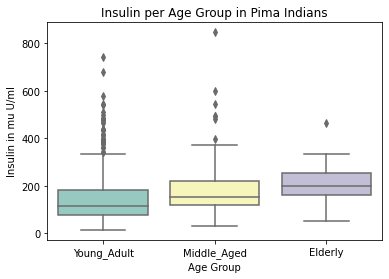

In [146]:
ax = sns.boxplot(x="Age_Category", y="Insulin",
                 data=df_fill_3, palette="Set3")
ax.set_title('Insulin per Age Group in Pima Indians')
ax.set_xlabel('Age Group')
ax.set_ylabel('Insulin in mu U/ml')

Text(0, 0.5, 'Insulin in mu U/ml')

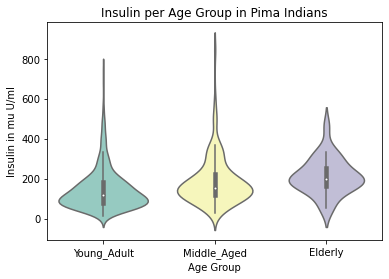

In [147]:
ax = sns.violinplot(x="Age_Category", y="Insulin",
                 data=df_fill_3, palette="Set3")
ax.set_title('Insulin per Age Group in Pima Indians')
ax.set_xlabel('Age Group')
ax.set_ylabel('Insulin in mu U/ml')

In [148]:
##t-test YA and MA, Insulin

mean1 = df_YA['Insulin'].mean()
mean2 = df_MA['Insulin'].mean()

SD1 = np.std(df_YA['Insulin'])
SD2 = np.std(df_MA['Insulin'])

n1 = len(df_YA['Insulin'])
n2 = len(df_MA['Insulin'])

SE1 = SD1/math.sqrt(n1)
SE2 = SD2/math.sqrt(n2)

SEBW = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

df = n1 + n2 - 2

t_statistic = (mean1 - mean2) / SEBW

p_value = stats.t.sf(np.abs(t_statistic), df)*2   

print(t_statistic, df, p_value,SD1**2, SD2**2)

-3.9390662908502265 741 8.952522028685551e-05 10182.30423390275 13623.968971261973


In [149]:
##t-test YA and E, Insulin

mean1 = df_YA['Insulin'].mean()
mean2 = df_E['Insulin'].mean()

SD1 = np.std(df_YA['Insulin'])
SD2 = np.std(df_E['Insulin'])

n1 = len(df_YA['Insulin'])
n2 = len(df_E['Insulin'])

SE1 = SD1/math.sqrt(n1)
SE2 = SD2/math.sqrt(n2)

SEBW = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

df = n1 + n2 - 2

t_statistic = (mean1 - mean2) / SEBW

p_value = stats.t.sf(np.abs(t_statistic), df)*2   

print(t_statistic, df, p_value,SD1**2, SD2**2)


-3.759179557231062 619 0.0001866147912683689 10182.30423390275 7707.449600000001


In [150]:
##t-test MA and E, Insulin

mean1 = df_MA['Insulin'].mean()
mean2 = df_E['Insulin'].mean()

SD1 = np.std(df_MA['Insulin'])
SD2 = np.std(df_E['Insulin'])

n1 = len(df_MA['Insulin'])
n2 = len(df_E['Insulin'])

SE1 = SD1/math.sqrt(n1)
SE2 = SD2/math.sqrt(n2)

SEBW = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

df = n1 + n2 - 2

t_statistic = (mean1 - mean2) / SEBW

p_value = stats.t.sf(np.abs(t_statistic), df)*2   

print(t_statistic, df, p_value,SD1**2, SD2**2)

-1.3254010201065047 170 0.18681663720248892 13623.968971261973 7707.449600000001


In [113]:
#ANOVA - one way - Insulin
total_mean = df_fill_3['Insulin'].mean()

SS_T = sum((df_fill_3['Insulin'] - (total_mean))**2)

df_fill_3_a = df_fill_3[['Insulin', 'Age_Category']]

#each group mean 
group_means = df_fill_3_a.groupby('Age_Category').mean()                            
                                  
#add means to data frame
df_fill_3_a = df_fill_3_a.merge(group_means, left_on = 'Age_Category',right_index = True)

#SS
SS_W = sum((df_fill_3_a['Insulin_x'] - df_fill_3_a['Insulin_y'])**2 )

SS_B = sum(((total_mean) - (df_fill_3_a['Insulin_y']))**2)

#DF
k = len(pd.unique(df_fill_3_a.Age_Category)) 
N = len(df_fill_3_a.values) 
n = df_fill_3_a.groupby('Age_Category').size()[0]

DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

#MS

MSbetween = SS_B/DFbetween

MSwithin = SS_W/DFwithin

#F and P statistic

F = MSbetween/MSwithin

p = stats.f.sf(F, DFbetween, DFwithin)

eta_sqrd = SS_B/SS_T

om_sqrd = (SS_B - (DFbetween * MSwithin))/(SS_T + MSwithin)


F_crit = stats.f.ppf(q=1-.05, dfn=DFbetween, dfd=DFwithin )


print(SS_W,SS_B, DFbetween, DFwithin,DFtotal,MSbetween,MSwithin, F,eta_sqrd,om_sqrd,p,F_crit)


8264063.002181547 286869.0443679254 2 765 767 143434.5221839627 10802.696734877838 13.277658875757075 0.033548277872666024 0.03098246545260447 2.144928576399971e-06 3.007494217264394


In [115]:
#posthoc test
df_fill_3_a_mean = df_fill_3_a.groupby('Age_Category')['Insulin_x'].mean()
df_fill_3_a_mean

Age_Category
Young_Adult    145.210570
Middle_Aged    186.479592
Elderly        213.020000
Name: Insulin_x, dtype: float64

In [117]:
Mean_YA = 145.210570
Mean_MA = 186.479592
Mean_E = 213.020000

Diff1 = (Mean_YA - Mean_MA)
Diff2 = (Mean_YA - Mean_E)
Diff3 = (Mean_MA - Mean_E)

SD1 = np.std(df_MA['Insulin'])
SD2 = np.std(df_E['Insulin'])
SD3 = np.std(df_YA['Insulin'])

n1 = len(df_MA['Insulin'])
n2 = len(df_E['Insulin'])
n3 = len(df_YA['Insulin'])

SEBW1 = math.sqrt(((SD3**2.0)/n3) + ((SD1**2.0)/n1))
SEBW2 = math.sqrt(((SD3**2.0)/n3) + ((SD2**2.0)/n2))
SEBW3 = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

#alpha = 0.05, (2,743-2)
q1=2.78

Tukey1 =  '0.000054'
Tukey2 = '0.004142'
Tukey3 = '0.465278'

Cohen1 = (Mean_YA - Mean_MA) / (math.sqrt(((n3 - 1)*SD3**2 + (n1 - 1)*SD1**2) / (n3 + n1 - 2)))
Cohen2 = (Mean_YA - Mean_E) / (math.sqrt(((n3 - 1)*SD3**2 + (n2 - 1)*SD2**2) / (n3 + n2 - 2)))
Cohen3 = (Mean_MA - Mean_E) / (math.sqrt(((n1 - 1)*SD1**2 + (n2 - 1)*SD2**2) / (n1 + n2 - 2)))

print(SEBW1, SEBW2, SEBW3, Diff1, Diff2, Diff3, Tukey1, Tukey2, Tukey3, Cohen1, Cohen2, Cohen3)


10.476853731250191 18.03835876894065 20.02443619753108 -41.26902200000001 -67.80943000000002 -26.540408000000014 0.000054 0.004142 0.465278 -0.3960051977885275 -0.6751854982271298 -0.2346899372944133


#### BMI 

Text(0, 0.5, 'BMI in weight in kg/(height in m)^2')

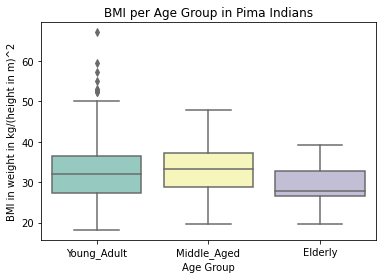

In [151]:
ax = sns.boxplot(x="Age_Category", y="BMI",
                 data=df_fill_3, palette="Set3")
ax.set_title('BMI per Age Group in Pima Indians')
ax.set_xlabel('Age Group')
ax.set_ylabel('BMI in weight in kg/(height in m)^2')

Text(0, 0.5, 'BMI in weight in kg/(height in m)^2')

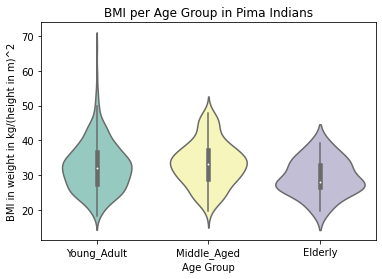

In [152]:
ax = sns.violinplot(x="Age_Category", y="BMI",
                 data=df_fill_3, palette="Set3")
ax.set_title('BMI per Age Group in Pima Indians')
ax.set_xlabel('Age Group')
ax.set_ylabel('BMI in weight in kg/(height in m)^2')

In [153]:
##t-test YA and MA, BMI

mean1 = df_YA['BMI'].mean()
mean2 = df_MA['BMI'].mean()

SD1 = np.std(df_YA['BMI'])
SD2 = np.std(df_MA['BMI'])

n1 = len(df_YA['BMI'])
n2 = len(df_MA['BMI'])

SE1 = SD1/math.sqrt(n1)
SE2 = SD2/math.sqrt(n2)

SEBW = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

df = n1 + n2 - 2

t_statistic = (mean1 - mean2) / SEBW

p_value = stats.t.sf(np.abs(t_statistic), df)*2   

print(t_statistic, df, p_value,SD1**2, SD2**2)

-1.5802850612188257 741 0.1144683374457788 50.10890237911581 40.35229418297932


In [154]:
##t-test YA and E, BMI

mean1 = df_YA['BMI'].mean()
mean2 = df_E['BMI'].mean()

SD1 = np.std(df_YA['BMI'])
SD2 = np.std(df_E['BMI'])

n1 = len(df_YA['BMI'])
n2 = len(df_E['BMI'])

SE1 = SD1/math.sqrt(n1)
SE2 = SD2/math.sqrt(n2)

SEBW = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

df = n1 + n2 - 2

t_statistic = (mean1 - mean2) / SEBW

p_value = stats.t.sf(np.abs(t_statistic), df)*2   

print(t_statistic, df, p_value,SD1**2, SD2**2)

2.8303935393991018 619 0.004799949945720336 50.10890237911581 25.282816000000004


In [155]:
##t-test MA and E, BMI

mean1 = df_MA['BMI'].mean()
mean2 = df_E['BMI'].mean()

SD1 = np.std(df_MA['BMI'])
SD2 = np.std(df_E['BMI'])

n1 = len(df_MA['BMI'])
n2 = len(df_E['BMI'])

SE1 = SD1/math.sqrt(n1)
SE2 = SD2/math.sqrt(n2)

SEBW = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

df = n1 + n2 - 2

t_statistic = (mean1 - mean2) / SEBW

p_value = stats.t.sf(np.abs(t_statistic), df)*2   

print(t_statistic, df, p_value,SD1**2, SD2**2)

3.4469329098611876 170 0.0007145560991854733 40.35229418297932 25.282816000000004


In [123]:
#ANOVA - one way - BMI
total_mean = df_fill_3['BMI'].mean()

SS_T = sum((df_fill_3['BMI'] - (total_mean))**2)

df_fill_3_a = df_fill_3[['BMI', 'Age_Category']]

#each group mean 
group_means = df_fill_3_a.groupby('Age_Category').mean()                            
                                  
#add means to data frame
df_fill_3_a = df_fill_3_a.merge(group_means, left_on = 'Age_Category',right_index = True)

#SS
SS_W = sum((df_fill_3_a['BMI_x'] - df_fill_3_a['BMI_y'])**2 )

SS_B = sum(((total_mean) - (df_fill_3_a['BMI_y']))**2)

#DF
k = len(pd.unique(df_fill_3_a.Age_Category)) 
N = len(df_fill_3_a.values) 
n = df_fill_3_a.groupby('Age_Category').size()[0]

DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

#MS

MSbetween = SS_B/DFbetween

MSwithin = SS_W/DFwithin

#F and P statistic

F = MSbetween/MSwithin

p = stats.f.sf(F, DFbetween, DFwithin)

eta_sqrd = SS_B/SS_T

om_sqrd = (SS_B - (DFbetween * MSwithin))/(SS_T + MSwithin)


F_crit = stats.f.ppf(q=1-.05, dfn=DFbetween, dfd=DFwithin )


print(SS_W,SS_B, DFbetween, DFwithin,DFtotal,MSbetween,MSwithin, F,eta_sqrd,om_sqrd,p,F_crit)

36428.76346285102 345.5089850656877 2 765 767 172.75449253284384 47.6192986442497 3.6278252190029874 0.009395399611373168 0.006796782454843935 0.02703212894404706 3.007494217264394


In [125]:
#posthoc test
df_fill_3_a_mean = df_fill_3_a.groupby('Age_Category')['BMI_x'].mean()
df_fill_3_a_mean 

Age_Category
Young_Adult    32.334312
Middle_Aged    33.280612
Elderly        29.372000
Name: BMI_x, dtype: float64

In [127]:
Mean_YA = 32.334312
Mean_MA = 33.280612
Mean_E = 29.372000

Diff1 = (Mean_YA - Mean_MA)
Diff2 = (Mean_YA - Mean_E)
Diff3 = (Mean_MA - Mean_E)

SD1 = np.std(df_MA['BMI'])
SD2 = np.std(df_E['BMI'])
SD3 = np.std(df_YA['BMI'])

n1 = len(df_MA['BMI'])
n2 = len(df_E['BMI'])
n3 = len(df_YA['BMI'])

SEBW1 = math.sqrt(((SD3**2.0)/n3) + ((SD1**2.0)/n1))
SEBW2 = math.sqrt(((SD3**2.0)/n3) + ((SD2**2.0)/n2))
SEBW3 = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

#alpha = 0.05, (2,743-2)
q1=2.78

Tukey1 =  '0.296700'
Tukey2 = '0.089932'
Tukey3 = '0.024439'

Cohen1 = (Mean_YA - Mean_MA) / (math.sqrt(((n3 - 1)*SD3**2 + (n1 - 1)*SD1**2) / (n3 + n1 - 2)))
Cohen2 = (Mean_YA - Mean_E) / (math.sqrt(((n3 - 1)*SD3**2 + (n2 - 1)*SD2**2) / (n3 + n2 - 2)))
Cohen3 = (Mean_MA - Mean_E) / (math.sqrt(((n1 - 1)*SD1**2 + (n2 - 1)*SD2**2) / (n1 + n2 - 2)))

print(SEBW1, SEBW2, SEBW3, Diff1, Diff2, Diff3, Tukey1, Tukey2, Tukey3, Cohen1, Cohen2, Cohen3)


0.5988161171574929 1.0466078442101774 1.133939170593071 -0.9463000000000008 2.962311999999997 3.908611999999998 0.296700 0.089932 0.024439 -0.13632199516331114 0.42255690913912225 0.6321930713427099


#### DiabetesPedigreeFunction 

Text(0, 0.5, 'Diabetes Pedigree Function')

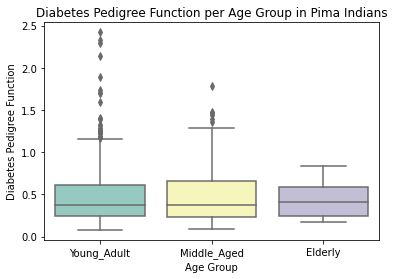

In [442]:
ax = sns.boxplot(x="Age_Category", y="DiabetesPedigreeFunction",
                 data=df_fill_3, palette="Set3")
ax.set_title('Diabetes Pedigree Function per Age Group in Pima Indians')
ax.set_xlabel('Age Group')
ax.set_ylabel('Diabetes Pedigree Function')

Text(0, 0.5, 'Diabetes Pedigree Function')

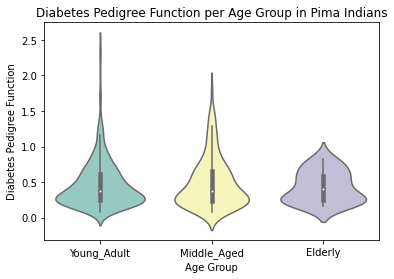

In [443]:
ax = sns.violinplot(x="Age_Category", y="DiabetesPedigreeFunction",
                 data=df_fill_3, palette="Set3")
ax.set_title('Diabetes Pedigree Function per Age Group in Pima Indians')
ax.set_xlabel('Age Group')
ax.set_ylabel('Diabetes Pedigree Function')

In [173]:
##t-test YA and MA, DiabetesPedigreeFunction

mean1 = df_YA['DiabetesPedigreeFunction'].mean()
mean2 = df_MA['DiabetesPedigreeFunction'].mean()

SD1 = np.std(df_YA['DiabetesPedigreeFunction'])
SD2 = np.std(df_MA['DiabetesPedigreeFunction'])

n1 = len(df_YA['DiabetesPedigreeFunction'])
n2 = len(df_MA['DiabetesPedigreeFunction'])

SE1 = SD1/math.sqrt(n1)
SE2 = SD2/math.sqrt(n2)

SEBW = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

df = n1 + n2 - 2

t_statistic = (mean1 - mean2) / SEBW

p_value = stats.t.sf(np.abs(t_statistic), df)*2   

print(t_statistic, df, p_value,SD1**2, SD2**2)

-0.712448743889164 741 0.47641120673155013


In [174]:
##t-test MA and E, DiabetesPedigreeFunction

mean1 = df_MA['DiabetesPedigreeFunction'].mean()
mean2 = df_E['DiabetesPedigreeFunction'].mean()

SD1 = np.std(df_MA['DiabetesPedigreeFunction'])
SD2 = np.std(df_E['DiabetesPedigreeFunction'])

n1 = len(df_MA['DiabetesPedigreeFunction'])
n2 = len(df_E['DiabetesPedigreeFunction'])

SE1 = SD1/math.sqrt(n1)
SE2 = SD2/math.sqrt(n2)

SEBW = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

df = n1 + n2 - 2

t_statistic = (mean1 - mean2) / SEBW

p_value = stats.t.sf(np.abs(t_statistic), df)*2   

print(t_statistic, df, p_value,SD1**2, SD2**2)

1.1361185207680748 170 0.2575060326681737


In [175]:
##t-test YA and E, DiabetesPedigreeFunction

mean1 = df_YA['DiabetesPedigreeFunction'].mean()
mean2 = df_E['DiabetesPedigreeFunction'].mean()

SD1 = np.std(df_YA['DiabetesPedigreeFunction'])
SD2 = np.std(df_E['DiabetesPedigreeFunction'])

n1 = len(df_YA['DiabetesPedigreeFunction'])
n2 = len(df_E['DiabetesPedigreeFunction'])

SE1 = SD1/math.sqrt(n1)
SE2 = SD2/math.sqrt(n2)

SEBW = math.sqrt(((SD1**2.0)/n1) + ((SD2**2.0)/n2))

df = n1 + n2 - 2

t_statistic = (mean1 - mean2) / SEBW

p_value = stats.t.sf(np.abs(t_statistic), df)*2   


print(t_statistic, df, p_value,SD1**2, SD2**2)


0.7995275908234392 619 0.4242912512464435


In [85]:
#Diabetes Pedigree function has no significant t-tests

In [359]:
#ANOVA - two way 

#create three bins for Glucose
categorical_v2 = pd.cut(df_fill_3.Glucose,bins=[0,140,199,300], labels=['Normal', 'Pre-diabetic', 'Diabetic'])
df_fill_3.insert(3,'Glucose_Category',categorical_v2)
df_fill_3_2A = df_fill_3[['Glucose_Category','Glucose','Age_Category','Insulin']]
df_fill_3_2A

Glucose_Category  Glucose Age_Category  Insulin
0       Pre-diabetic    148.0  Middle_Aged    113.0
1             Normal     85.0  Young_Adult     88.5
2       Pre-diabetic    183.0  Young_Adult    227.5
3             Normal     89.0  Young_Adult     94.0
4             Normal    137.0  Young_Adult    168.0
..               ...      ...          ...      ...
763           Normal    101.0      Elderly    180.0
764           Normal    122.0  Young_Adult    202.5
765           Normal    121.0  Young_Adult    112.0
766           Normal    126.0  Middle_Aged    123.5
767           Normal     93.0  Young_Adult     62.5

[768 rows x 4 columns]

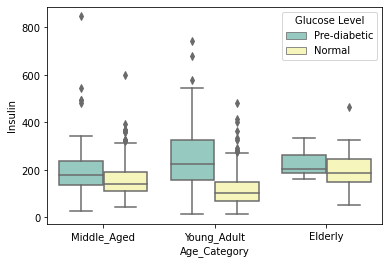

In [445]:
sns.boxplot(x="Age_Category", y="Insulin", hue="Glucose_Category", data=df_fill_3_2A, palette="Set3")
ax.set_title('Insulin and Glucose Levels in Age Groups for Pima Indians')
ax.set_xlabel('Age Group')
ax.set_ylabel('Insulin Level in mu U/ml')
plt.legend(title='Glucose Level')


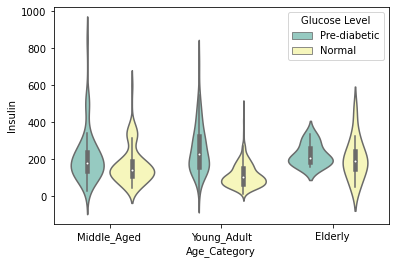

In [446]:
sns.violinplot(x="Age_Category", y="Insulin", hue="Glucose_Category", data=df_fill_3_2A, palette="Set3")
ax.set_title('Insulin and Glucose Levels in Age Groups for Pima Indians')
ax.set_xlabel('Age Group')
ax.set_ylabel('Insulin Level in mu U/ml')
plt.legend(title='Glucose Level')


In [365]:
model = ols('Insulin ~ C(Age_Category) + C(Glucose_Category) + C(Glucose_Category):C(Age_Category)', data=df_fill_3_2A).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df           F  \
C(Age_Category)                      9.490389e+04    2.0    5.823226   
C(Glucose_Category)                  1.779171e+06    1.0  218.337022   
C(Glucose_Category):C(Age_Category)  2.755531e+05    2.0   16.907715   
Residual                             6.209339e+06  762.0         NaN   

                                           PR(>F)  
C(Age_Category)                      3.091270e-03  
C(Glucose_Category)                  1.246802e-43  
C(Glucose_Category):C(Age_Category)  6.536369e-08  
Residual                                      NaN

In [363]:
# convert category to string 
df_fill_3_2A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Glucose_Category  768 non-null    category
 1   Glucose           768 non-null    float64 
 2   Age_Category      768 non-null    category
 3   Insulin           768 non-null    float64 
dtypes: category(2), float64(2)
memory usage: 13.9 KB


In [364]:
df_fill_3_2A['Glucose_Category'] = df_fill_3_2A['Glucose_Category'].astype('str') 
df_fill_3_2A['Age_Category'] = df_fill_3_2A['Age_Category'].astype('str') 

/tmp/ipykernel_27/3103699696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fill_3_2A['Glucose_Category'] = df_fill_3_2A['Glucose_Category'].astype('str')
/tmp/ipykernel_27/3103699696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fill_3_2A['Age_Category'] = df_fill_3_2A['Age_Category'].astype('str')


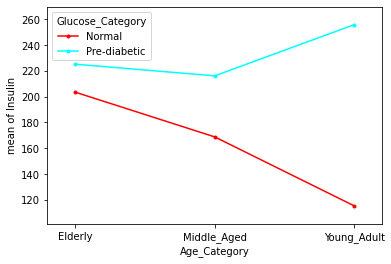

In [456]:
fig = interaction_plot(x=df_fill_3_2A['Age_Category'], 
                       trace=df_fill_3_2A['Glucose_Category'], 
                       response=df_fill_3_2A['Insulin'])


In [316]:
res = stat()
res.tukey_hsd(df=df_fill_3_2A, res_var='Insulin', xfac_var='Age_Category', anova_model='Glucose ~ C(Age_Category) + C(Glucose_Category) + C(Glucose_Category):C(Age_Category)')
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1       group2       Diff     Lower      Upper    q-value  \
0  Middle_Aged  Young_Adult  11.711272  7.833642  15.588903  10.030358   
1  Middle_Aged      Elderly   5.670204 -3.439188  14.779596   2.067227   
2  Young_Adult      Elderly  17.381477  8.785276  25.977677   6.715200   

    p-value  
0  0.001000  
1  0.310583  
2  0.001000

# Multiple Linear Regression

In [420]:
#make df for MLR

df_fill_3_MLR = df_fill_3[['Age','Glucose', 'Insulin']]
df_fill_3_MLR

Age  Glucose  Insulin
0    50.0    148.0    113.0
1    31.0     85.0     88.5
2    32.0    183.0    227.5
3    21.0     89.0     94.0
4    33.0    137.0    168.0
..    ...      ...      ...
763  63.0    101.0    180.0
764  27.0    122.0    202.5
765  30.0    121.0    112.0
766  47.0    126.0    123.5
767  23.0     93.0     62.5

[768 rows x 3 columns]

In [368]:
X = df_fill_3_MLR[['Glucose', 'Insulin']]
y = df_fill_3_MLR['Age']

In [369]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [370]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [373]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Glucose     0.090416
Insulin     0.011794

In [383]:
print(regressor.intercept_)

20.74510728887224


In [374]:
y_pred = regressor.predict(X_test)
df_MLR_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [375]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual  Predicted
661    22.0  44.593624
122    23.0  31.599022
113    25.0  28.212322
14     51.0  37.818119
529    31.0  32.556284
..      ...        ...
476    29.0  32.491446
482    28.0  29.008375
230    22.0  38.272303
527    24.0  32.471737
380    24.0  31.386730

[154 rows x 2 columns]

In [384]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 8.665372395910229
Mean Squared Error: 112.77366632579604
Root Mean Squared Error: 10.61949463608302


In [391]:
print("Model score:", str(regressor.score(X_test, y_test)))

Model score: -0.010563152570475465


#####Outcome Related Relationships

Text(0.5, 1.0, 'Heat Map for Diabetes Variables in Pima Indians')

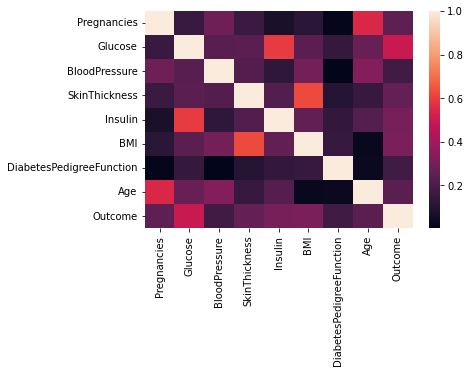

In [457]:
#See if there is any correlation between variables - without median replacement
sns.heatmap(df_fill_3.corr())
df_fill_3.corr()
ax.set_title('Heat Map for Diabetes Variables in Pima Indians')

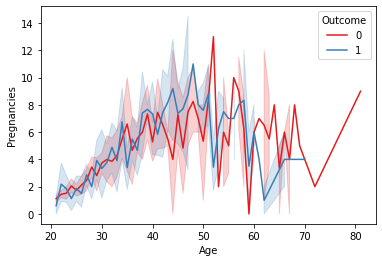

In [12]:
ax = sns.lineplot(x="Age", y="Pregnancies", hue="Outcome",
                 data=df, palette="Set1")

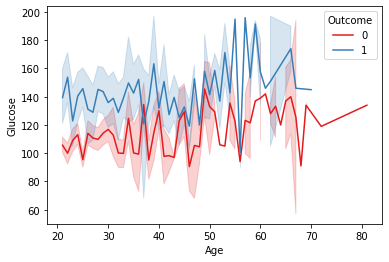

In [13]:
ax = sns.lineplot(x="Age", y="Glucose", hue="Outcome",
                 data=df, palette="Set1")

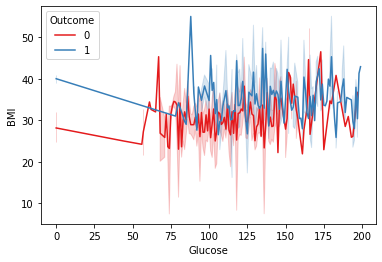

In [5]:
ax = sns.lineplot(x="Glucose", y="BMI", hue="Outcome",
                 data=df, palette="Set1")

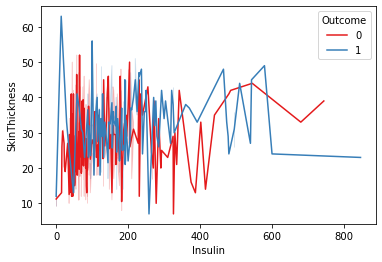

In [15]:
ax = sns.lineplot(x="Insulin", y="SkinThickness", hue="Outcome",
                 data=df, palette="Set1")

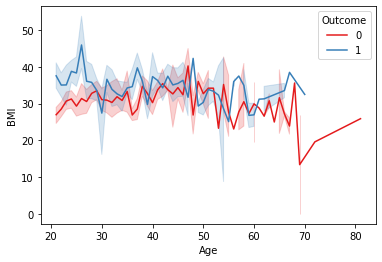

In [16]:
ax = sns.lineplot(x="Age", y="BMI", hue="Outcome",
                 data=df, palette="Set1")

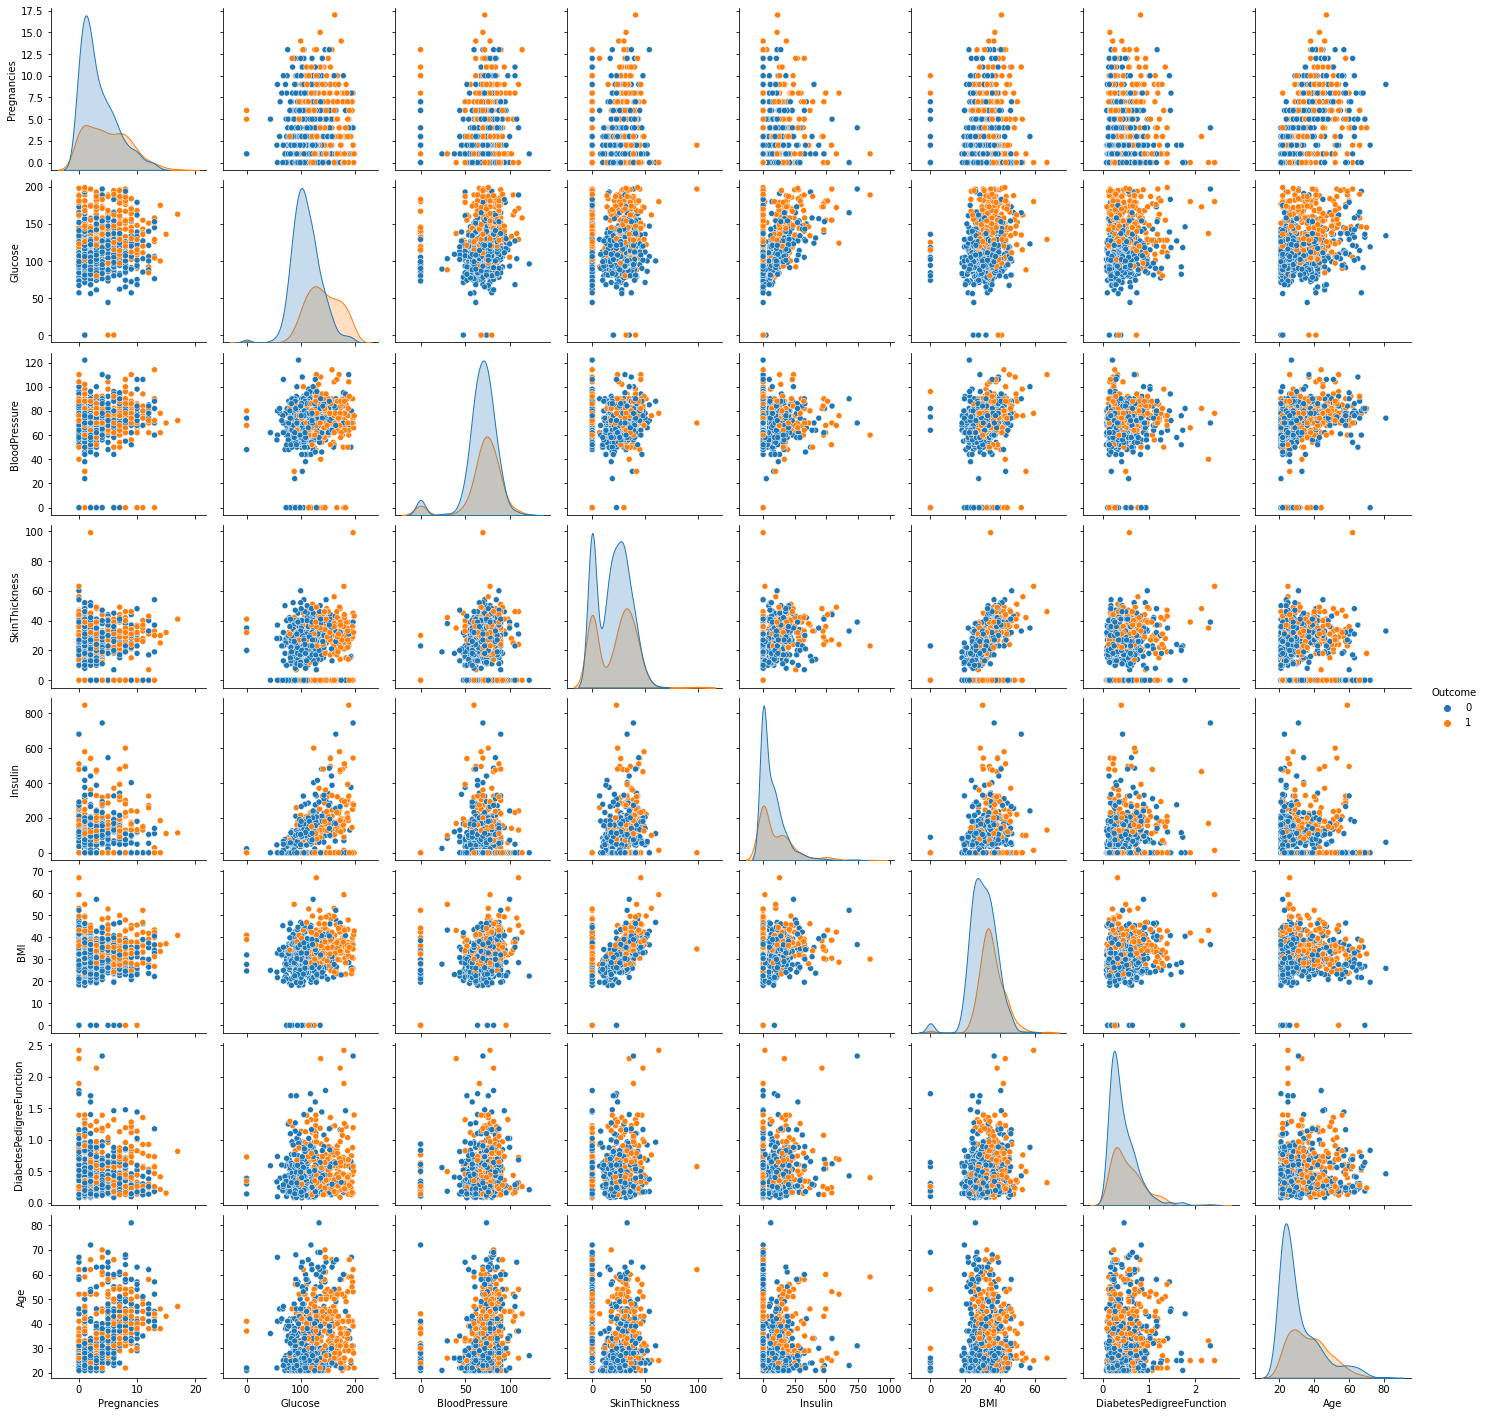

In [18]:
#EDA using pairplots to look at differences in outcome (diabetic or not)
sns.pairplot(df, hue="Outcome")
